# Transformada de Fourier da função $\dfrac{1}{r}$

Este código faz uma comparação entre a transformada de Fourier analítica e a transformada de Fourier numérica da função inverso da distância.

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import rcParams as rc
from scipy.fftpack import fft2, ifft2, fftfreq, fftshift

In [2]:
rc['lines.linewidth'] = 1.
rc['font.size'] = 14

### Input

In [3]:
x0 = 0.0
y0 = 50.0
z0 = 10.0

Nx = 64
Ny = 64

x = np.linspace(-50., 50., Nx)
y = np.linspace(0., 100., Ny)

X, Y = np.meshgrid(x, y)

Z = np.zeros_like(X)

shape = (Nx, Ny)

In [4]:
r = np.sqrt((X-x0)**2. + (Y-y0)**2. + (Z-z0)**2.)

In [5]:
f = 1./r

### Transformada de Fourier numérica

In [6]:
kx, ky = np.meshgrid(fftfreq(Nx), fftfreq(Ny))

In [7]:
Fn = fft2(f)

### Transformada inversa de Fourier

In [8]:
fn = ifft2(Fn).real

### Teste de validação

In [9]:
np.allclose(fn, f)

True

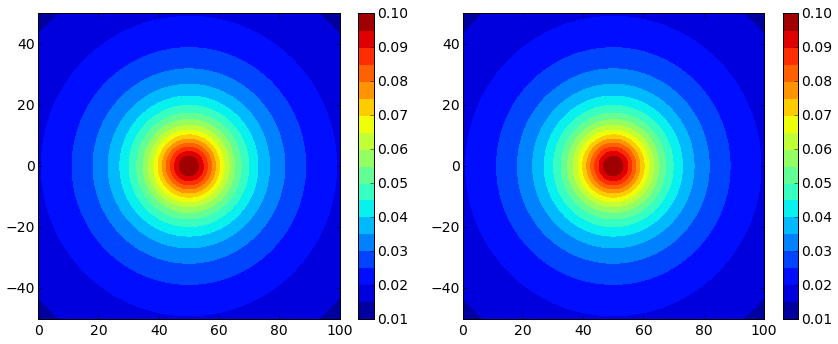

In [10]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.contourf(Y,X,f,20)
plt.colorbar()
plt.subplot(1,2,2)
plt.contourf(Y,X,fn,20)
plt.colorbar()
plt.tight_layout()
plt.show()

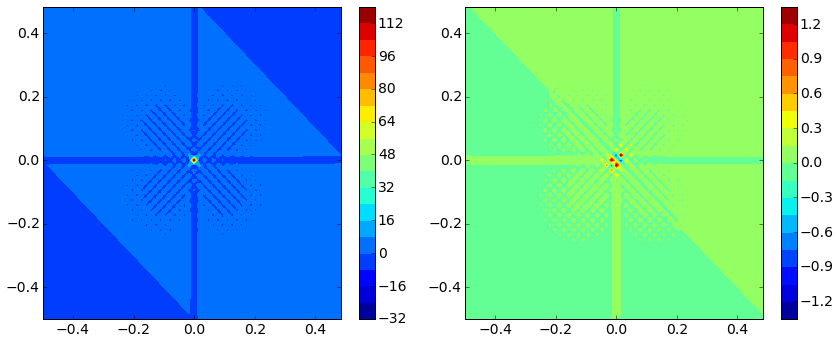

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.contourf(fftshift(ky),fftshift(kx),fftshift(Fn).real,20)
plt.colorbar()
plt.subplot(1,2,2)
plt.contourf(fftshift(ky),fftshift(kx),fftshift(Fn).imag,20)
plt.colorbar()
plt.tight_layout()
plt.show()

### Derivadas

In [12]:
dx_f = -(X-x0)/(r**3.)

In [13]:
DX_F = fft2(dx_f)

In [14]:
DX_Fn = Fn*kx*1j

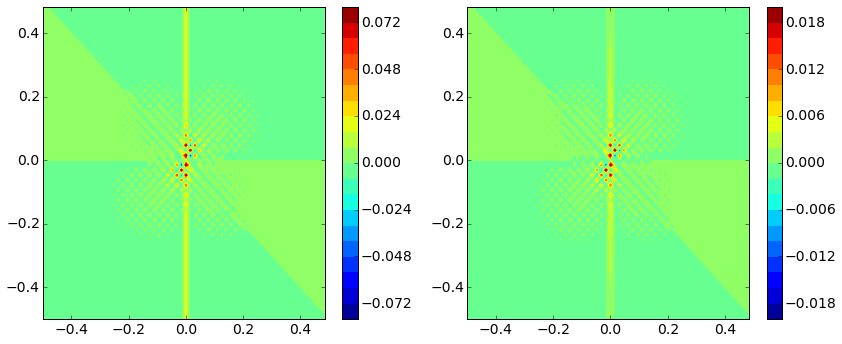

In [16]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.contourf(fftshift(ky),fftshift(kx),fftshift(DX_F).real,20)
plt.colorbar()
plt.subplot(1,2,2)
plt.contourf(fftshift(ky),fftshift(kx),fftshift(DX_Fn).real,20)
plt.colorbar()
plt.tight_layout()
plt.show()